I use the dataset related to San Fransisco incidents 
during summer 2014 to understand the prevalence of the different type of infractions and potential seasonnal effects. 

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SFdat=pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

# Type of infractions reported in San Fransisco

The number of occurence for each type of infraction is presented in fig. 1. To do so, I had to map each type of infraction to an integer identifier such as to be able to plot the data. After that, I had to associate the thicks on the x-axis to the corresponding infraction label. 

In [19]:
SF_cat2int=np.unique(SFdat.Category.values,return_inverse=True)

In [20]:
import collections

In [25]:
counter_SF=collections.Counter(SF_cat2int[1])


In [33]:
bugType_SF=counter_SF.keys()
bugNb_SF=counter_SF.values()

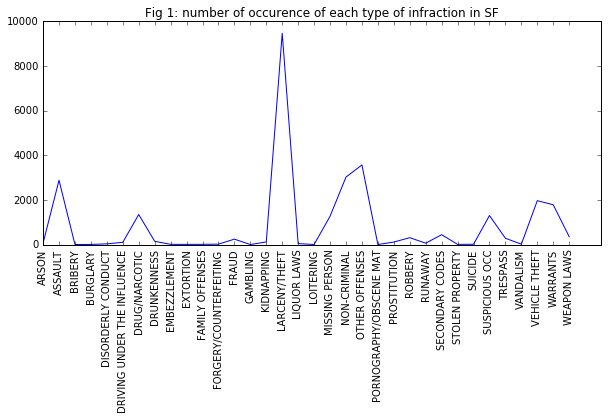

In [146]:
plt.plot(bugType_SF,bugNb_SF,'b')
plt.xticks(bugType_SF,SF_cat2int[0],rotation=90)
fig=plt.gcf()
sizeFig=fig.get_size_inches()
fig.set_size_inches(10,4)
plt.title('Fig 1: number of occurence of each type of infraction in SF')
plt.show()

Fig 1 shows that there is significantly more drug infractions that drunkness cases. This might be a sign that people in SF prefer to get high rather than getting drunk. More seriously, this is more probably related to the fact that police officers might be more severe with respect to drug users than drunk people. 
In SF, the vast majority of infractions are larcenies of thefts. In the following, we will focus on this group on infraction and check if depends on the day of the week.  

Fig. 2 shows the fraction of infraction for the different days of the week. 
Prior to plot, the results I had to map the different days of the week to an integer identifier. By default, ipython sorts the element of the list containing the days of the week in the alphabetical order (i.e ['Friday','Monday','Saturday',etc...]). This order is not convenient for plotting the results. I therefore choose to permute the index of each day so that I obtain the fraction of buglaries sorted in chronological order. 

# Variation of the frequency of the infractions with the day of the week

In [85]:
SF_theft=SFdat[SFdat.Category == "LARCENY/THEFT"]



In [86]:
allBug_day2int=np.unique(SFdat.DayOfWeek.values,return_inverse=True)
larceny_day2int=np.unique(SF_theft.DayOfWeek.values,return_inverse=True)

In [87]:
count_day_allBug=collections.Counter(allBug_day2int[1])
count_day_larceny=collections.Counter(larceny_day2int[1])

In [136]:
day_allBug_int=count_day_allBug.keys()
day_allBug_nb=map(float,count_day_allBug.values())
frac_allBug=np.array(day_allBug_nb)/sum(day_allBug_nb)

In [137]:
day_larceny_int=count_day_larceny.keys()
day_larceny_nb=map(float,count_day_larceny.values())
frac_larceny=np.array(day_larceny_nb)/sum(day_larceny_nb)

In [153]:
# show the relation between days of the week and integer identifier
print allBug_day2int[0]
print np.unique(allBug_day2int[1])    

['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
[0 1 2 3 4 5 6]


In [138]:
frac_allBug_sort=[frac_allBug[i] for i in [1, 5 ,6 ,4 ,0, 2, 3]]
frac_larceny_sort=[frac_larceny[i] for i in [1, 5 ,6 ,4 ,0, 2, 3]]

In [125]:
sortDayInt=range(7)
labelDay=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

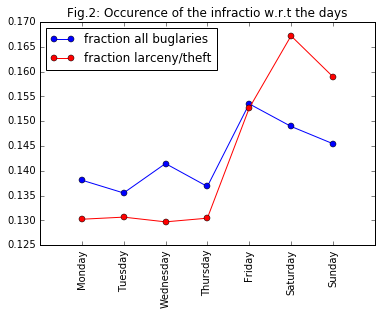

In [148]:
plt.plot(sortDayInt,frac_allBug_sort,'o-',label='fraction all buglaries')
plt.xlim([-1, 7])
plt.hold
plt.plot(sortDayInt,frac_larceny_sort,'o-r',label='fraction larceny/theft')
plt.xticks(sortDayInt,labelDay,rotation=90)
plt.title('Fig.2: Occurence of the infractions w.r.t the days')
plt.legend(loc=2)






Fig 2 shows the frequency of the infractions w.r.t the days of the week. Considering first all infractions irrespective of their category, we see a slight increase of the infractions of about 1% during the week-end. The increase of infractions frequency during the week-end is much more pronounced for the larceny and the theft as the corresponding frequency clearly increases on Friday and reaches a peak on Saturday. People are more likely to be away from home during the weekend which may explain why the thieve prefer to organize their attack during this specific period. 

# Variation of the number of thefts during the summer period

In [220]:
dateUn=np.unique(SF_theft.Date.values,return_counts=True)
meanJune=np.mean(dateUn[1][0:29])
meanJuly=np.mean(dateUn[1][30:61])
meanAug=np.mean(dateUn[1][62:])




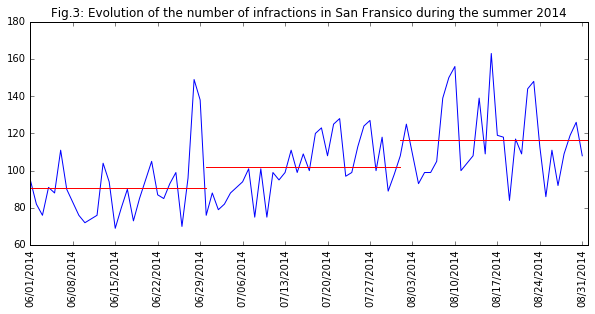

In [221]:
plt.plot(dateUn[1])
myXlab=dateUn[0][np.arange(0,92,7)]
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.xticks(np.arange(0,92,7),myXlab,rotation=90)
plt.hold
plt.plot([0,29],[meanJune , meanJune],'r')
plt.plot([29,61],[meanJuly , meanJuly],'r')
plt.plot([61, 92],[meanAug , meanAug],'r')
plt.title('Fig.3: Evolution of the number of Larceny/Theft in San Fransico during the summer 2014')

The blue curve of Fig. 3 shows the evolution of the number of larcenies/thefts in SF over the summer 2014. In June, the number of thefts is rather stable except a very strong peak during the last weekend. Without surprises, we observe a clear increase of the number of larcenies during the first half of July, which corresponds to the start of the summer holidays. The overall increase of the thefts during the summer is best seen on the red curve which shows the monthly averaged number of thefts. 

In [190]:
np.arange(0,92,15)

array([ 0, 15, 30, 45, 60, 75, 90])

In [191]:
timeUn[0][[1 , 2 ,3]]

array(['06/02/2014', '06/03/2014', '06/04/2014'], dtype=object)

27

In [187]:
timeUn[0][27]

'06/28/2014'

In [184]:
type(timeUn[1])

numpy.ndarray

In [173]:
timeUn

(array(['06/01/2014', '06/02/2014', '06/03/2014', '06/04/2014',
        '06/05/2014', '06/06/2014', '06/07/2014', '06/08/2014',
        '06/09/2014', '06/10/2014', '06/11/2014', '06/12/2014',
        '06/13/2014', '06/14/2014', '06/15/2014', '06/16/2014',
        '06/17/2014', '06/18/2014', '06/19/2014', '06/20/2014',
        '06/21/2014', '06/22/2014', '06/23/2014', '06/24/2014',
        '06/25/2014', '06/26/2014', '06/27/2014', '06/28/2014',
        '06/29/2014', '06/30/2014', '07/01/2014', '07/02/2014',
        '07/03/2014', '07/04/2014', '07/05/2014', '07/06/2014',
        '07/07/2014', '07/08/2014', '07/09/2014', '07/10/2014',
        '07/11/2014', '07/12/2014', '07/13/2014', '07/14/2014',
        '07/15/2014', '07/16/2014', '07/17/2014', '07/18/2014',
        '07/19/2014', '07/20/2014', '07/21/2014', '07/22/2014',
        '07/23/2014', '07/24/2014', '07/25/2014', '07/26/2014',
        '07/27/2014', '07/28/2014', '07/29/2014', '07/30/2014',
        '07/31/2014', '08/01/2014', '08/

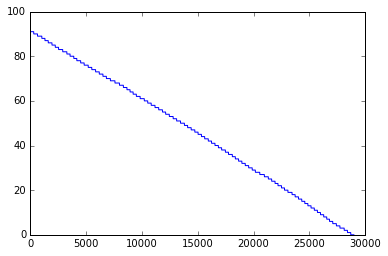

In [175]:
plt.plot( timeUn[1] )

In [170]:
timeUn[0]

array(['00:01', '00:02', '00:03', ..., '23:57', '23:58', '23:59'], dtype=object)

In [157]:
type(SFdat.Time[1])

str

In [159]:
import time
time.struct_time(tm_hour=23,tm_min=45)

TypeError: Required argument 'sequence' (pos 1) not found

In [161]:
len(np.unique(SFdat.Date))

92

In [162]:
np.unique(SFdat.Date)

array(['06/01/2014', '06/02/2014', '06/03/2014', '06/04/2014',
       '06/05/2014', '06/06/2014', '06/07/2014', '06/08/2014',
       '06/09/2014', '06/10/2014', '06/11/2014', '06/12/2014',
       '06/13/2014', '06/14/2014', '06/15/2014', '06/16/2014',
       '06/17/2014', '06/18/2014', '06/19/2014', '06/20/2014',
       '06/21/2014', '06/22/2014', '06/23/2014', '06/24/2014',
       '06/25/2014', '06/26/2014', '06/27/2014', '06/28/2014',
       '06/29/2014', '06/30/2014', '07/01/2014', '07/02/2014',
       '07/03/2014', '07/04/2014', '07/05/2014', '07/06/2014',
       '07/07/2014', '07/08/2014', '07/09/2014', '07/10/2014',
       '07/11/2014', '07/12/2014', '07/13/2014', '07/14/2014',
       '07/15/2014', '07/16/2014', '07/17/2014', '07/18/2014',
       '07/19/2014', '07/20/2014', '07/21/2014', '07/22/2014',
       '07/23/2014', '07/24/2014', '07/25/2014', '07/26/2014',
       '07/27/2014', '07/28/2014', '07/29/2014', '07/30/2014',
       '07/31/2014', '08/01/2014', '08/02/2014', '08/03

In [81]:
frac_larceny=day_larceny_nb/sum(day_larceny_nb)
frac_larceny

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [82]:
frac_larceny=np.array(day_larceny_nb)/sum(day_larceny_nb)

In [83]:
frac_larceny

array([ 0.1526516 ,  0.13025565,  0.16723009,  0.15899007,  0.13046693,
        0.13067822,  0.12972745])

Counter({0: 4451, 1: 4005, 2: 4319, 3: 4218, 4: 3968, 5: 3930, 6: 4102})

In [56]:
type(SFdat)

pandas.core.frame.DataFrame

In [57]:
type(larency)

pandas.core.indexing._LocIndexer

In [63]:
SF_theft=SFdat[SFdat.Category == "LARCENY/THEFT"]


In [45]:

count_dayOfWeek_SF[1]

array([3, 3, 3, ..., 3, 3, 3])

In [44]:
sizeFig

array([ 6.,  4.])

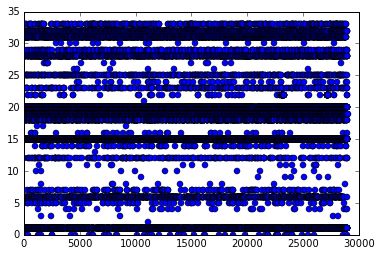

In [23]:
plt.plot(xTest[1],'o')

In [12]:
xTest

(array(['ARSON', 'ASSAULT', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT',
        'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS',
        'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
        'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
        'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
        'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
        'PROSTITUTION', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES',
        'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TRESPASS',
        'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'], dtype=object),
 array([ 0, 19, 15, ..., 15, 15, 19]))

In [13]:
len(xTest)

2

In [14]:
type(xTest)

tuple

In [15]:
xTest[0]

array(['ARSON', 'ASSAULT', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS',
       'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES',
       'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TRESPASS',
       'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [16]:
xTest[1]

array([ 0, 19, 15, ..., 15, 15, 19])

In [17]:
len(xTest[1])

28993

ValueError: could not convert string to float: NON-CRIMINAL

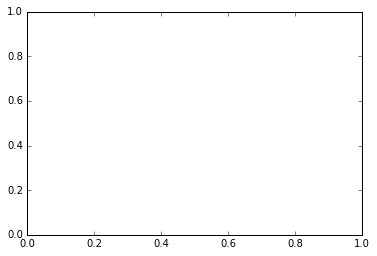

In [6]:
plt.plot(SFdat.Category.values,SFdat.Y.values,'o')

In [ ]:
plt.show()

In [ ]:
# 

In [ ]:
SFdat.DayOfWeek.values

In [ ]:
()